#Análisis exploratorio del Dataset Titanic

##Introducción

El naufragio del Titanic es uno de los desastres marítimos más conocidos de la historia, y el dataset asociado proporciona una oportunidad única para analizar los factores que pudieron influir en la supervivencia de los pasajeros. Este proyecto tiene como objetivo explorar y visualizar los datos del Titanic para identificar patrones y tendencias que expliquen la probabilidad de supervivencia.

##Preparacion de Datos

###Limpieza de datos 

Durante la preparación del dataset:
- Se reemplazaron los valores nulos en la columna Age con la media de todas las edades.
- Se modificaron las variables categóricas como Sex y Embarked para convertirlas en valores numéricos.
- Se agregó una nueva columna llamada Tamaño_Familia, que combina las columnas SibSp (hermanos/esposos a bordo) y Parch (padres/hijos a bordo).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

ruta= "C:/Users/sohai/Downloads/train.csv"
df =pd.read_csv(ruta)

print(df.head())
print(df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [3]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas. ")
print("Columnas del dataset:", df.columns.tolist())

El dataset tiene 891 filas y 12 columnas. 
Columnas del dataset: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [4]:
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
print("Estadisticas descriptivas:")
print(df.describe())

Estadisticas descriptivas:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
tasa_supervivencia = df['Survived'].mean() * 100
print(f"Tasa de supervivencia: {tasa_supervivencia:.2f}%")

Tasa de supervivencia: 38.38%


In [7]:
supervivencia_genero = df.groupby('Sex')['Survived'].mean() * 100
print("Tasa de supervivencia por genero: ")
print(supervivencia_genero)

Tasa de supervivencia por genero: 
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


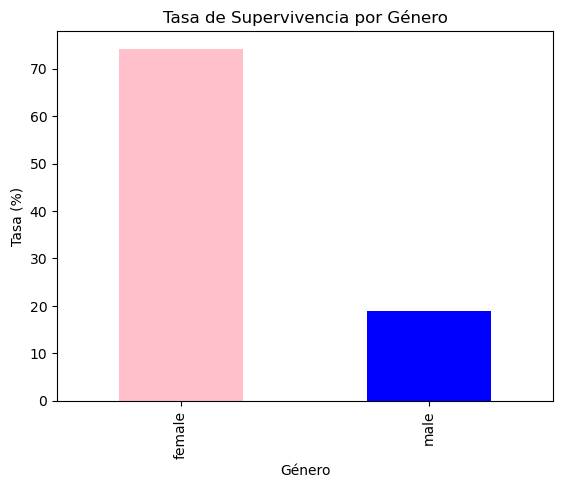

In [8]:
supervivencia_genero.plot(kind='bar', color=['pink', 'blue'])
plt.title("Tasa de Supervivencia por Género")
plt.ylabel("Tasa (%)")
plt.xlabel("Género")
plt.show()

In [9]:
print(df['Sex'].isnull().sum())

0


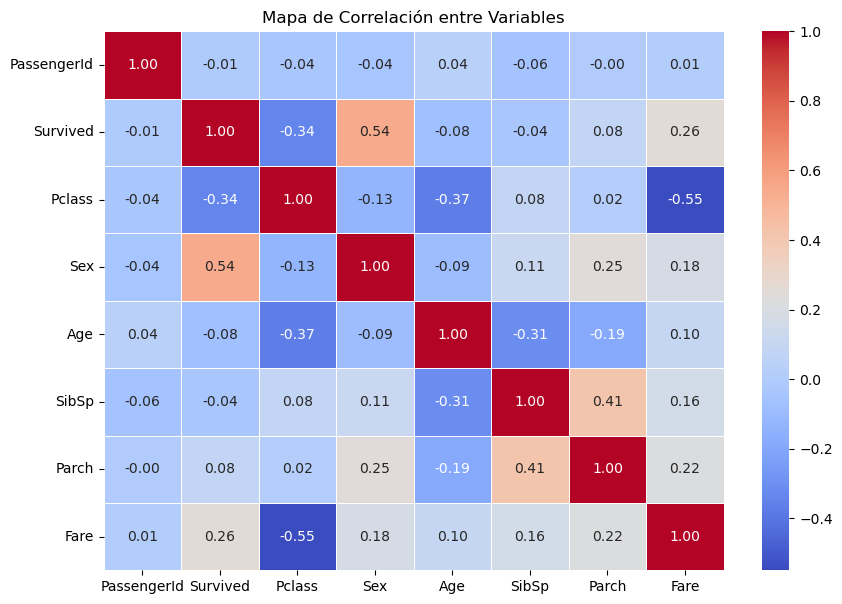

In [10]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
datos_numericos = df.select_dtypes(include=['number'])

correlacion = datos_numericos.corr()

# Visualizar con un mapa de calor
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlación entre Variables")
plt.show()

In [11]:
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
# Rellenar valores nulos en Age con la mediana
df['Age'].fillna(df['Age'].median(), inplace=True)

# Rellenar valores nulos en Embarked con el valor más frecuente
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Eliminar la columna Cabin
df.drop(columns=['Cabin'], inplace=True)

# Verificar si quedan valores nulos
print("Valores nulos después del tratamiento:")
print(df.isnull().sum())

Valores nulos después del tratamiento:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\sohai\AppData\Local\Temp\ipykernel_5404\3641731032.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\sohai\AppData\Local\Temp\ipykernel_5404\3641731032.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Tasa de supervivencia por puerto de embarque:
Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64


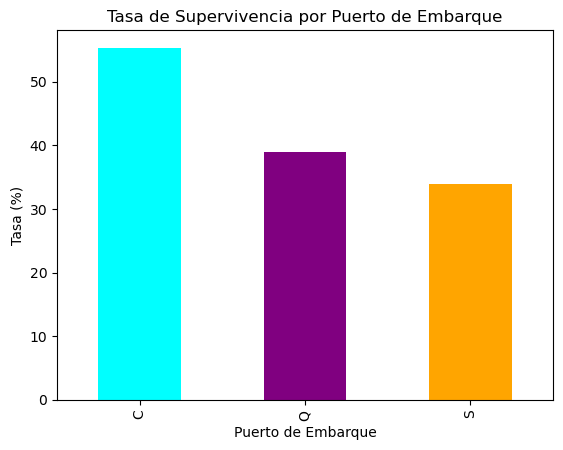

In [13]:
# Supervivencia por puerto de embarque
supervivencia_puerto = df.groupby('Embarked')['Survived'].mean() * 100
print("Tasa de supervivencia por puerto de embarque:")
print(supervivencia_puerto)

# Visualizar
import seaborn as sns
import matplotlib.pyplot as plt

supervivencia_puerto.plot(kind='bar', color=['cyan', 'purple', 'orange'])
plt.title("Tasa de Supervivencia por Puerto de Embarque")
plt.ylabel("Tasa (%)")
plt.xlabel("Puerto de Embarque")
plt.show()

Tasa de supervivencia por tamaño de familia:
Tamaño_Familia
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64


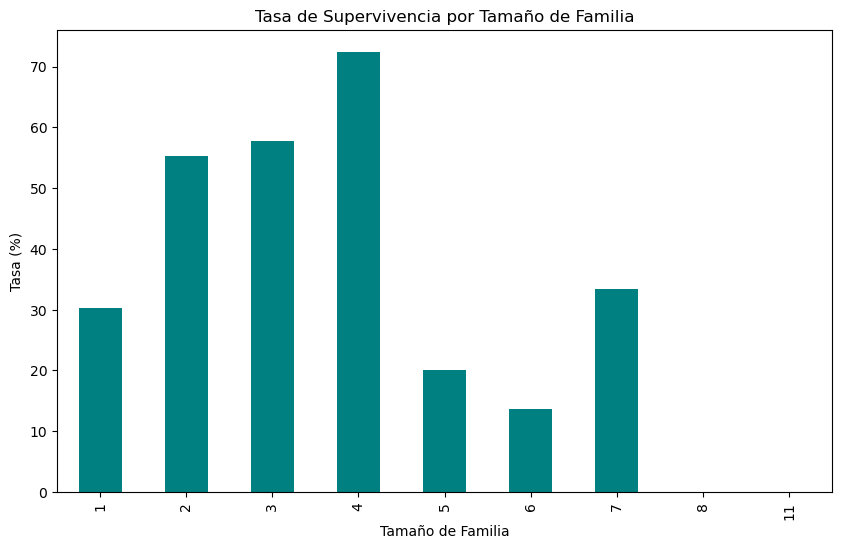

In [14]:
# Tamaño de la familia = hermanos/cónyuges + padres/hijos + 1 (el pasajero mismo)
df['Tamaño_Familia'] = df['SibSp'] + df['Parch'] + 1

# Ver relación entre tamaño de la familia y supervivencia
tasa_familia = df.groupby('Tamaño_Familia')['Survived'].mean() * 100
print("Tasa de supervivencia por tamaño de familia:")
print(tasa_familia)

# Visualización
tasa_familia.plot(kind='bar', figsize=(10, 6), color='teal')
plt.title("Tasa de Supervivencia por Tamaño de Familia")
plt.ylabel("Tasa (%)")
plt.xlabel("Tamaño de Familia")
plt.show()


In [15]:
# Guardar el dataset limpio en un nuevo archivo CSV
df.to_csv("C:/Users/sohai/Downloads/titanic_limpio.csv", index=False)
print("El dataset limpio se ha guardado correctamente.")

El dataset limpio se ha guardado correctamente.


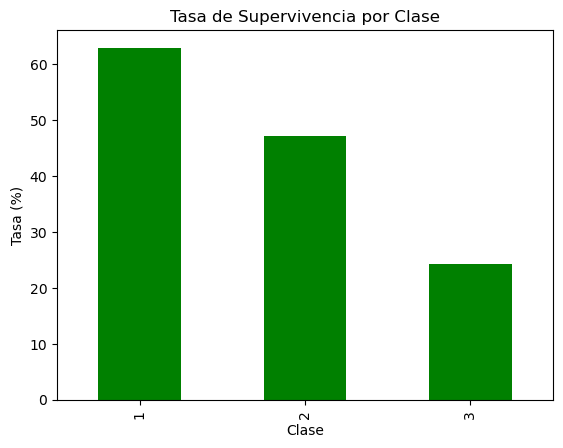

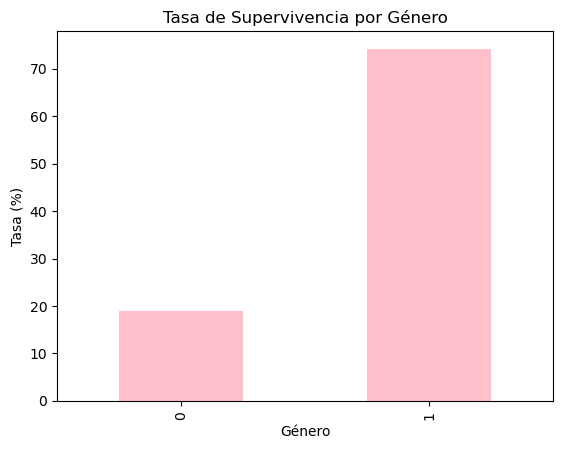

In [16]:
# Supervivencia por clase
supervivencia_clase = df.groupby('Pclass')['Survived'].mean() * 100
supervivencia_clase.plot(kind='bar', color='green')
plt.title("Tasa de Supervivencia por Clase")
plt.ylabel("Tasa (%)")
plt.xlabel("Clase")
plt.show()

# Supervivencia por género
supervivencia_genero = df.groupby('Sex')['Survived'].mean() * 100
supervivencia_genero.plot(kind='bar', color='pink')
plt.title("Tasa de Supervivencia por Género")
plt.ylabel("Tasa (%)")
plt.xlabel("Género")
plt.show()

Tasa de supervivencia por género:
Sex
0    18.890815
1    74.203822
Name: Survived, dtype: float64


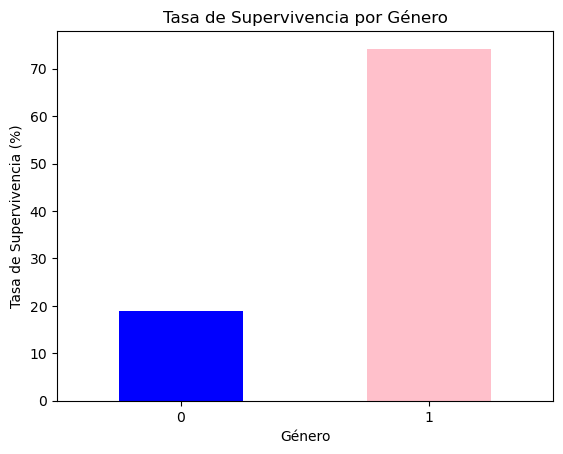

In [17]:
# Supervivencia por género
supervivencia_genero = df.groupby('Sex')['Survived'].mean() * 100
print("Tasa de supervivencia por género:")
print(supervivencia_genero)

# Visualización
supervivencia_genero.plot(kind='bar', color=['blue', 'pink'])
plt.title("Tasa de Supervivencia por Género")
plt.ylabel("Tasa de Supervivencia (%)")
plt.xlabel("Género")
plt.xticks(rotation=0)
plt.show()

Tasa de supervivencia por clase:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


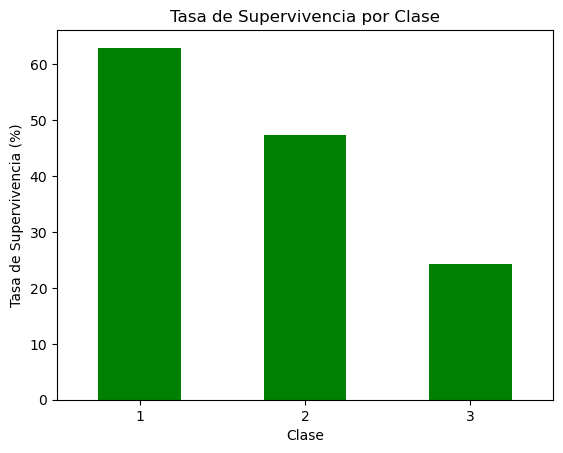

In [18]:
# Supervivencia por clase
supervivencia_clase = df.groupby('Pclass')['Survived'].mean() * 100
print("Tasa de supervivencia por clase:")
print(supervivencia_clase)

# Visualización
supervivencia_clase.plot(kind='bar', color='green')
plt.title("Tasa de Supervivencia por Clase")
plt.ylabel("Tasa de Supervivencia (%)")
plt.xlabel("Clase")
plt.xticks(rotation=0)
plt.show()

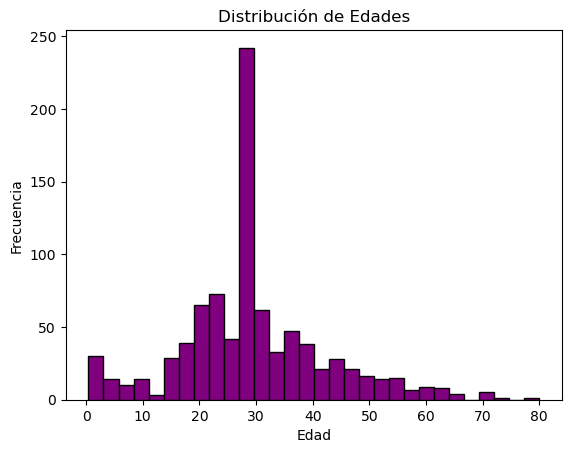

In [19]:
# Histograma de edades
plt.hist(df['Age'], bins=30, color='purple', edgecolor='black')
plt.title("Distribución de Edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

C:\Users\sohai\AppData\Local\Temp\ipykernel_5404\1466666439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y='Age', palette="Set2")


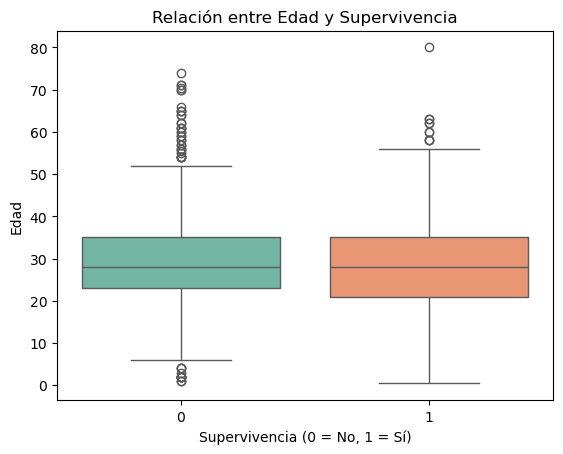

In [20]:
# Boxplot de edades por supervivencia
sns.boxplot(data=df, x='Survived', y='Age', palette="Set2")
plt.title("Relación entre Edad y Supervivencia")
plt.xlabel("Supervivencia (0 = No, 1 = Sí)")
plt.ylabel("Edad")
plt.show()

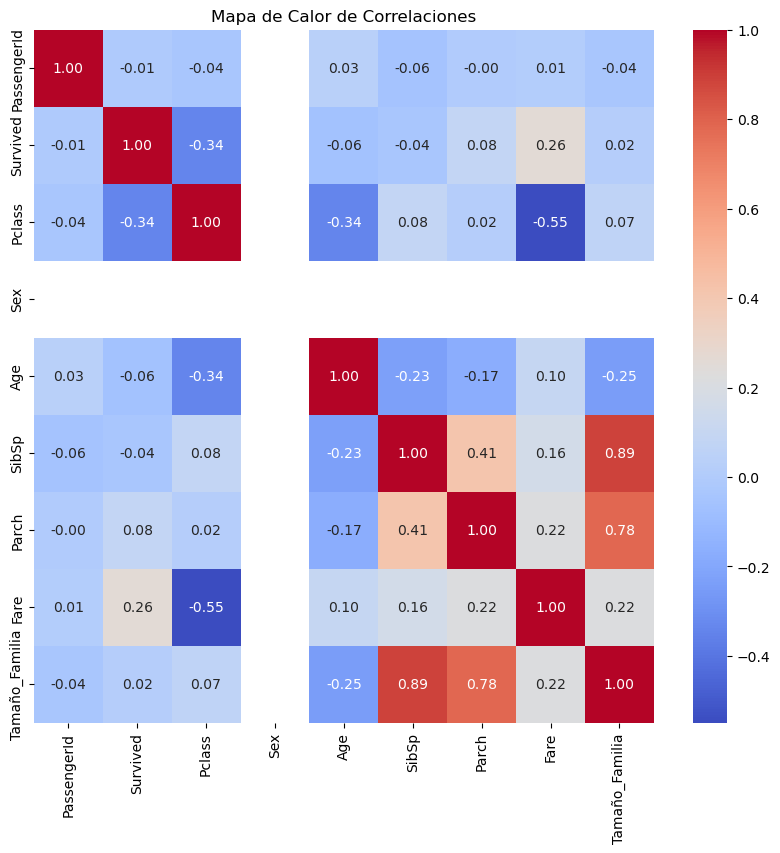

In [21]:
# Calcular correlaciones
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df_numerico = df.select_dtypes(include=['number'])
correlaciones = df_numerico.corr()

# Visualizar el mapa de calor
plt.figure(figsize=(10, 9))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

In [22]:
# Guardar un gráfico como imagen
plt.savefig("C:/Users/sohai/Downloads/supervivencia_por_genero.png")

<Figure size 640x480 with 0 Axes>